# **Web Scraping (Skytrax)**

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as rq

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from PIL import Image

In [4]:
global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

verified=[]
rating=[]
feedback=[]
Aircraft=[]
Class=[]
Travel_type=[]
Route=[]
Date=[]
comfort=[]
staff=[]
food=[]
entertainment=[]
wifi=[]
ground_service=[]
vfm=[]
recommend=[]

In [5]:
def value_fetcher(soup):
    rating.append(np.nan)
    Aircraft.append(np.nan)
    Class.append(np.nan)
    Travel_type.append(np.nan)
    Route.append(np.nan)
    Date.append(np.nan)
    comfort.append(np.nan)
    staff.append(np.nan)
    food.append(np.nan)
    entertainment.append(np.nan)
    wifi.append(np.nan)
    ground_service.append(np.nan)
    vfm.append(np.nan)
    recommend.append(np.nan)

    for row in soup.find_all('tr'):
        header=row.find('td',class_='review-rating-header').text
        value=row.find('td',class_='review-value')
        if header=='Aircraft':
            Aircraft[-1]=value.text
        elif header=='Type Of Traveller':
            Travel_type[-1]=value.text
        elif header=='Seat Type':
            Class[-1]=value.text
        elif header=='Route':
            Route[-1]=value.text
        elif header=='Date Flown':
            Date[-1]=value.text
        elif header=='Seat Comfort':
            comfort[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Cabin Staff Service':
            staff[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Food & Beverages':
            food[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Inflight Entertainment':
            entertainment[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Ground Service':
            ground_service[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Value For Money':
            vfm[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Recommended':
            recommend[-1]=value.text
        elif header=='Wifi & Connectivity':
            wifi[-1]=len(row.find_all('span',class_='star fill'))

In [6]:
def fetcher(soup,tag,key,value):
    if soup.find(tag,{key:value}):
        return soup.find(tag,{key:value}).text
    return np.nan

In [7]:
for i in range(1,364):
    url=f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
    page=rq.get(url).text
    soup=BeautifulSoup(page,'lxml')
    articles= soup.find_all('article',{'itemprop':'review'})
    for article in articles:
        rating.append(fetcher(article,'span','itemprop','ratingValue'))
        div=article.find('div',class_='tc_mobile')
        content=(div.find('div',class_='text_content').text.split('|'))
        if len(content)==2:
            verification,review=content
        else:
            verification =np.nan
            review=content[0]
        verified.append(verification)
        feedback.append(review)
        table=div.find('table',class_='review-ratings')
        value_fetcher(table)

In [8]:
data1=pd.DataFrame({'status':verified,'aircraft':Aircraft,'travel_type':Travel_type,'travel_class':Class,'route':Route,'date':Date,'seating_comfort':comfort,'staff_service':staff,'food_quality':food,'entertainment':entertainment,'wifi':wifi,'ground_service':ground_service,'value_for_money':vfm,'recommended':recommend,'overall_rating':rating[::2],'review':feedback})

In [9]:
data1.to_csv('BA.csv',index=False)

In [10]:
df1 = pd.read_csv('BA.csv')

In [11]:
df1

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,1.0,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1.0,BA cancelled our flight and could not book u...
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ..."
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,8 months have passed and still wasting my ti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,NaN,NaN,NaN,Economy Class,NaN,NaN,5.0,5.0,5.0,0.0,NaN,NaN,4,yes,10.0,Flew LHR - VIE return operated by bmi but BA a...
3626,NaN,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,3.0,4.0,NaN,NaN,3,no,7.0,Flight from Heathrow to Toronto. Booked emerge...
3627,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,2.0,3.0,NaN,NaN,2,no,4.0,Business LHR to BKK. 747-400. First try back w...
3628,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,0.0,NaN,NaN,3,yes,9.0,LHR to HAM. Purser addresses all club passenge...


# **Data Cleaning**

In [13]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

# Esegui la sostituzione di testo in tutte le recensioni
for j in remove_text:
    df1['review'] = df1['review'].str.replace(j, '')


<ipython-input-13-ef7bbb31201e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['review'] = df1['review'].str.replace(j, '')


In [14]:
df1.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,1.0,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1.0,BA cancelled our flight and could not book u...
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ..."
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,8 months have passed and still wasting my ti...


## **Wordcloud**

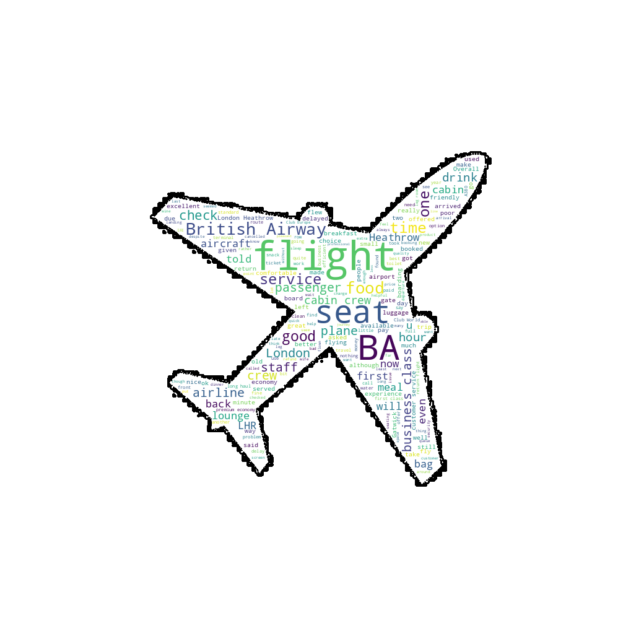

In [16]:
review_word = []

for i in df1['review'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

mask = np.array(Image.open("/content/airplan.jpg"))

wc = WordCloud(width = 1000, height = 450, background_color = 'white',mask = mask, contour_color = 'black', contour_width = 3).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

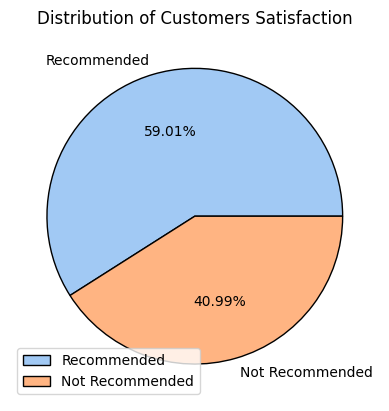

In [18]:
# Calculate the count of recommended and not recommended reviews
oc = df1.groupby('recommended')['review'].count().reset_index()

# Define explicit labels for the chart segments
labels = ['Recommended', 'Not Recommended']

# Create the pie chart
plt.pie(oc['review'], labels=labels, autopct='%.2f%%', colors=sns.color_palette('pastel'),
        wedgeprops={"edgecolor": "k"})

# Add a title to the chart
plt.title('Distribution of Customers Satisfaction')

# Show the legend
plt.legend()

# Show the chart
plt.show()

In [19]:
df1_soc = df1[df1['recommended'] == 'no']
df1_soc.describe()

,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,overall_rating
count,2034.000000,2024.000000,1815.000000,1416.000000,420.000000,1758.000000,2142.000000,2136.000000
mean,2.136676,2.434783,1.823691,2.036017,1.457143,2.106940,1.727824,2.486891
std,1.093738,1.286723,1.003736,1.139451,0.909022,1.213633,0.911887,1.609345
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,3.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [20]:
df1['review']

0          Chaos at Terminal 5 with BA cancellations a...
1         BA cancelled our flight and could not book u...
2        When on our way to Heathrow Airport and merel...
3        Nice flight, good crew, very good seat, food ...
4         8 months have passed and still wasting my ti...
                              ...                        
3625    Flew LHR - VIE return operated by bmi but BA a...
3626    Flight from Heathrow to Toronto. Booked emerge...
3627    Business LHR to BKK. 747-400. First try back w...
3628    LHR to HAM. Purser addresses all club passenge...
3629    My son who had worked for British Airways urge...
Name: review, Length: 3630, dtype: object

### **Another cleaning step**

In [22]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df1['cleaned Reviews'] = df1['review'].apply(clean)
df1.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,cleaned Reviews
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,1.0,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1.0,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...


## **Tokenization and Pos tagging**

In [25]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def token_stop_pos(text):
    doc = nlp(text)
    newlist = []
    for token in doc:
        if not token.is_stop:
            newlist.append(tuple([token.text, token.pos_]))
    return newlist

df1['pos tagged'] = df1['cleaned Reviews'].apply(token_stop_pos)
df1.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,cleaned Reviews,pos tagged
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,1.0,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)..."
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1.0,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancelled, VERB), (..."
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (..."
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[( , SPACE), (Nice, ADJ), (flight, NOUN), (goo..."
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[( , SPACE), (months, NOUN), (passed, VERB), (..."


## **Lemmization**

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
        else:
            lemma = nlp(word)[0].lemma_
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df1['lemma'] = df1['pos tagged'].apply(lemmatize)
df1.head()


,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,cleaned Reviews,pos tagged,lemma
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,1.0,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)...",chaos terminal BA cancellation delay staff...
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1.0,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancelled, VERB), (...",BA cancel flight book flight day spend k e...
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (...",way heathrow airport merely half hour sche...
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[( , SPACE), (Nice, ADJ), (flight, NOUN), (goo...",nice flight good crew good seat food expec...
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[( , SPACE), (months, NOUN), (passed, VERB), (...",month pass waste time BA team share docume...


## **Sentiment Analysis**

In [35]:
from textblob import TextBlob

# Function for sentiment analysis using TextBlob
def textblob_sentiment(review):
    analysis = TextBlob(review)
    # Return a polarity score between -1 (negative) and 1 (positive)
    return analysis.sentiment.polarity

# Apply TextBlob sentiment analysis directly on the 'Cleaned Reviews' column
df1['sentiment'] = df1['cleaned Reviews'].apply(textblob_sentiment)

# Categorize sentiment using numpy's vectorized operations
def sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification using numpy's vectorized operations
df1['analysis'] = np.vectorize(sentiment_category)(df1['sentiment'])
df1.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,...,ground_service,value_for_money,recommended,overall_rating,review,cleaned Reviews,pos tagged,lemma,sentiment,analysis
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,...,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)...",chaos terminal BA cancellation delay staff...,-0.031985,Negative
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,...,NaN,1,no,1.0,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancelled, VERB), (...",BA cancel flight book flight day spend k e...,-0.131111,Negative
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,...,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (...",way heathrow airport merely half hour sche...,-0.063653,Negative
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,...,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[( , SPACE), (Nice, ADJ), (flight, NOUN), (goo...",nice flight good crew good seat food expec...,0.225956,Positive
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,...,1.0,1,no,1.0,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[( , SPACE), (months, NOUN), (passed, VERB), (...",month pass waste time BA team share docume...,-0.333333,Negative


In [36]:
sentiment_counts = df1['analysis'].value_counts()
sentiment_counts

Positive    2563
Negative    1050
Neutral       17
Name: analysis, dtype: int64

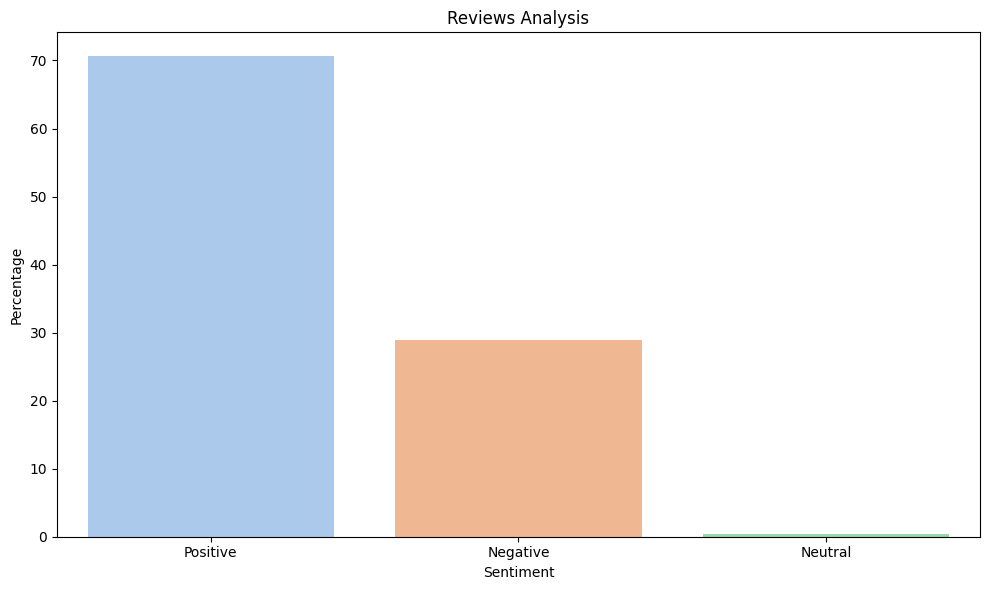

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))

total_counts = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_counts) * 100

sns.barplot(x=sentiment_counts.index, y=sentiment_percentages.values, palette='pastel')

plt.title("Reviews Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")

plt.tight_layout()
plt.show()


In [40]:
df1.to_csv("BA_reviews_final.csv")

In [41]:
df1.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,...,ground_service,value_for_money,recommended,overall_rating,review,cleaned Reviews,pos tagged,lemma,sentiment,analysis
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,...,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)...",chaos terminal BA cancellation delay staff...,-0.031985,Negative
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,...,NaN,1,no,1.0,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancelled, VERB), (...",BA cancel flight book flight day spend k e...,-0.131111,Negative
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,...,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (...",way heathrow airport merely half hour sche...,-0.063653,Negative
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,...,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ...",Nice flight good crew very good seat food was...,"[( , SPACE), (Nice, ADJ), (flight, NOUN), (goo...",nice flight good crew good seat food expec...,0.225956,Positive
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,...,1.0,1,no,1.0,8 months have passed and still wasting my ti...,months have passed and still wasting my time ...,"[( , SPACE), (months, NOUN), (passed, VERB), (...",month pass waste time BA team share docume...,-0.333333,Negative
